In [ ]:
"""
Course: ECSE 6410 Fall 2024
Project: Machine Learning Approaches to Classify Fake and Real Voices using MFCC and Timbre Features
by: Sriman Bidhan Baray
"""

In [2]:
import os
data_dir = './data/for-2sec/for-2seconds/'
split = os.listdir(data_dir)
for i in range(len(split)):
    split_dir = data_dir + split[i]
    print(split_dir)
    fake_audio = os.listdir(split_dir + '/fake')
    print(len(fake_audio))
    real_audio = os.listdir(split_dir + '/real')
    print(len(real_audio))
    print('-------------------')


./data/for-2sec/for-2seconds/testing
544
544
-------------------
./data/for-2sec/for-2seconds/training
6978
6978
-------------------
./data/for-2sec/for-2seconds/validation
1413
1413
-------------------


In [3]:
real_male_audio = r"C:\Work\academic_projects\for-ml\data\for-2sec\for-2seconds\training\real\file42.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"
real_female_audio = r"C:\Work\academic_projects\for-ml\data\for-2sec\for-2seconds\training\real\file30490.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"
fake_male_audio = r"C:\Work\academic_projects\for-ml\data\for-2sec\for-2seconds\training\fake\file22478.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"
fake_female_audio = r"C:\Work\academic_projects\for-ml\data\for-2sec\for-2seconds\training\fake\file7.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"

In [ ]:
# Play the audio files
import IPython.display as ipd
ipd.Audio(real_male_audio)

In [5]:
ipd.Audio(real_female_audio)

In [6]:
ipd.Audio(fake_male_audio)

In [7]:
ipd.Audio(fake_female_audio)

In [6]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

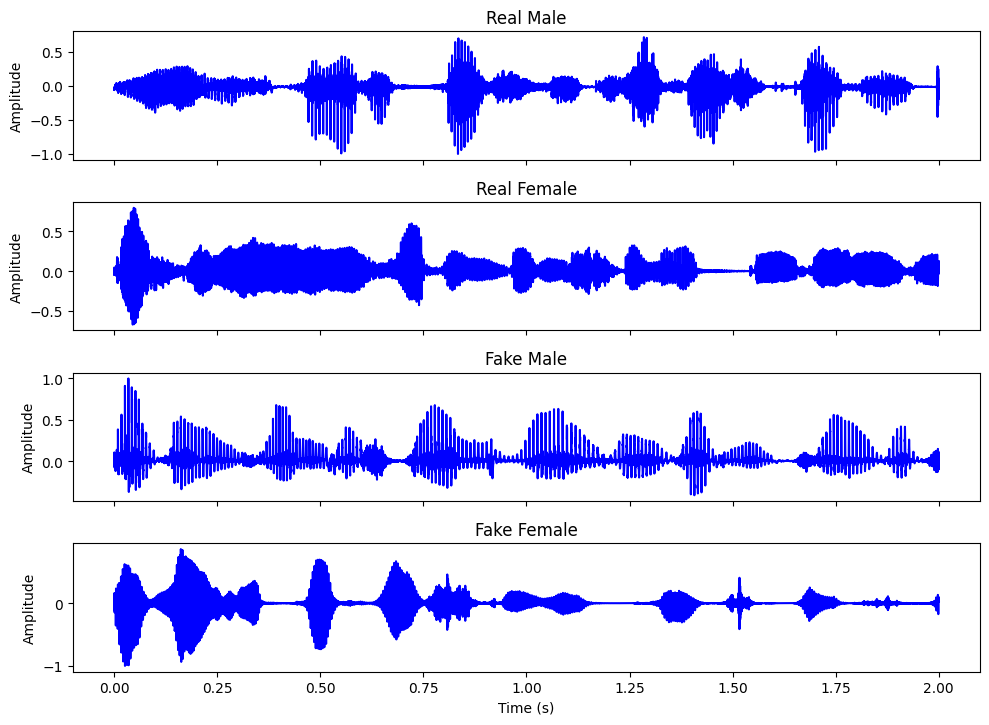

In [11]:
# List of audio files and titles
audio_files = [real_male_audio, real_female_audio, fake_male_audio, fake_female_audio]
titles = ["Real Male", "Real Female", "Fake Male", "Fake Female"]

# Initialize the plot
fig, axes = plt.subplots(len(audio_files), 1, figsize=(10, 8), sharex=True)
# fig.suptitle("Audio Waveforms", fontsize=16)

for i, (audio_file, title) in enumerate(zip(audio_files, titles)):
    # Load audio
    y, sr = librosa.load(audio_file, sr=None)
    time = np.linspace(0, len(y) / sr, len(y))
    
    # Plot waveform
    axes[i].plot(time, y, color='blue')
    axes[i].set_title(title, fontsize=12)
    axes[i].set_ylabel("Amplitude")
    if i == len(audio_files) - 1:
        axes[i].set_xlabel("Time (s)")

# Tight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Training: train+valdiation Test: Test

In [1]:
# Copy training files under data 2
import shutil
import os

src = './data/for-2sec/for-2seconds/training/fake'
dest = './data2/training/fake'

for afile in os.listdir(src):
    shutil.copy(os.path.join(src, afile), dest)

src = './data/for-2sec/for-2seconds/training/real'
dest = './data2/training/real'

for afile in os.listdir(src):
    shutil.copy(os.path.join(src, afile), dest)

src = './data/for-2sec/for-2seconds/validation/fake'
dest = './data2/training/fake'

for afile in os.listdir(src):
    shutil.copy(os.path.join(src, afile), dest)

src = './data/for-2sec/for-2seconds/validation/real'
dest = './data2/training/real'

for afile in os.listdir(src):
    shutil.copy(os.path.join(src, afile), dest)


## Feature Extraction

### Brightness, Hardness, Depth, Roughness

In [ ]:
import librosa
import numpy as np
import pandas as pd
import pickle
from scipy.signal import hilbert
from glob import glob

# Define a function to extract features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Brightness (Spectral Centroid)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        
        # Hardness (Onset Strength)
        onset_env = np.mean(librosa.onset.onset_strength(y=y, sr=sr))
        
        # Depth (Spectral Spread)
        spectral_spread = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        
        # Roughness (Amplitude Modulation using Hilbert Transform)
        amplitude_env = np.abs(hilbert(y))
        roughness = np.std(amplitude_env)
        
        return [spectral_centroid, onset_env, spectral_spread, roughness]
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return [None, None, None, None]

# Prepare data
fake_audio_files = glob('./data2/testing/fake/*.wav')
real_audio_files = glob('./data2/testing/real/*.wav')

data = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    features = extract_audio_features(file_path)
    data.append([file_path, *features, 0])  # 0 for fake label

# Extract features for real audio files
for file_path in real_audio_files:
    features = extract_audio_features(file_path)
    data.append([file_path, *features, 1])  # 1 for real label

# Create a DataFrame
columns = ["file_path", "spectral_centroid", "onset_env", "spectral_spread", "roughness", "is_real"]
df = pd.DataFrame(data, columns=columns)
df['file_path'] = df['file_path'].apply(lambda x: x.split('\\')[-1])
# Save to a pickle file
output_file = './testing_features_BHDR.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Feature extraction complete. Saved to {output_file}")


Feature extraction complete. Saved to ./testing_features_BHDR.pkl


In [26]:
with open('./testing_features_BHDR.pkl', 'rb') as f:
    df = pickle.load(f)
df


,file_path,spectral_centroid,onset_env,spectral_spread,roughness,is_real
0,./data2/testing/fake\file100.wav_16k.wav_norm....,1705.421068,2.754166,1575.576587,0.186789,0
1,./data2/testing/fake\file1000.wav_16k.wav_norm...,1668.099600,2.658266,1518.095941,0.189744,0
2,./data2/testing/fake\file1001.wav_16k.wav_norm...,1601.311494,2.751290,1569.763377,0.214734,0
3,./data2/testing/fake\file1004.wav_16k.wav_norm...,1727.693460,2.390216,1451.445244,0.220767,0
4,./data2/testing/fake\file1005.wav_16k.wav_norm...,1147.836520,2.619729,1188.796434,0.174877,0
...,...,...,...,...,...,...
1083,./data2/testing/real\file973.wav_16k.wav_norm....,2197.137239,3.296768,1636.211178,0.138351,1
1084,./data2/testing/real\file975.wav_16k.wav_norm....,1833.996666,2.648481,1593.833384,0.147372,1
1085,./data2/testing/real\file977.wav_16k.wav_norm....,1979.360644,2.841015,1741.411993,0.144828,1
1086,./data2/testing/real\file978.wav_16k.wav_norm....,1690.605900,2.320178,1625.520429,0.180321,1


In [28]:

# rename all elements in filename column
df['file_path'] = df['file_path'].apply(lambda x: x.split('\\')[-1])
df

,file_path,spectral_centroid,onset_env,spectral_spread,roughness,is_real
0,file100.wav_16k.wav_norm.wav_mono.wav_silence....,1705.421068,2.754166,1575.576587,0.186789,0
1,file1000.wav_16k.wav_norm.wav_mono.wav_silence...,1668.099600,2.658266,1518.095941,0.189744,0
2,file1001.wav_16k.wav_norm.wav_mono.wav_silence...,1601.311494,2.751290,1569.763377,0.214734,0
3,file1004.wav_16k.wav_norm.wav_mono.wav_silence...,1727.693460,2.390216,1451.445244,0.220767,0
4,file1005.wav_16k.wav_norm.wav_mono.wav_silence...,1147.836520,2.619729,1188.796434,0.174877,0
...,...,...,...,...,...,...
1083,file973.wav_16k.wav_norm.wav_mono.wav_silence....,2197.137239,3.296768,1636.211178,0.138351,1
1084,file975.wav_16k.wav_norm.wav_mono.wav_silence....,1833.996666,2.648481,1593.833384,0.147372,1
1085,file977.wav_16k.wav_norm.wav_mono.wav_silence....,1979.360644,2.841015,1741.411993,0.144828,1
1086,file978.wav_16k.wav_norm.wav_mono.wav_silence....,1690.605900,2.320178,1625.520429,0.180321,1


In [29]:
df.to_pickle('./testing_features_BHDR.pkl')

In [39]:
import librosa
import numpy as np
import pandas as pd
import pickle
from scipy.signal import hilbert
from glob import glob

# Define a function to extract features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Brightness (Spectral Centroid)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).flatten()
        # print(f"Spectral Centroid size: {spectral_centroid.shape}")
        
        # Hardness (Onset Strength)
        onset_env = librosa.onset.onset_strength(y=y, sr=sr).flatten()
        # print(f"Onset Strength size: {onset_env.shape}")
        
        # Depth (Spectral Spread)
        spectral_spread = librosa.feature.spectral_bandwidth(y=y, sr=sr).flatten()
        # print(f"Spectral Spread size: {spectral_spread.shape}")
        
        # Roughness (Standard Deviation of Amplitude Modulation)
        amplitude_env = np.abs(hilbert(y))
        roughness = np.std(amplitude_env)
        # print(f"Roughness value (std): {roughness}")
        
        return spectral_centroid, onset_env, spectral_spread, roughness
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None

# Prepare data
fake_audio_files = glob('./data2/training/fake/*.wav')
real_audio_files = glob('./data2/training/real/*.wav')

data = []
feature_vectors = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    spectral_centroid, onset_env, spectral_spread, roughness = extract_audio_features(file_path)
    if spectral_centroid is not None:
        data.append([file_path, roughness, 0])  # 0 for fake label
        feature_vectors.append(np.hstack([spectral_centroid, onset_env, spectral_spread]))

# Extract features for real audio files
for file_path in real_audio_files:
    spectral_centroid, onset_env, spectral_spread, roughness = extract_audio_features(file_path)
    if spectral_centroid is not None:
        data.append([file_path, roughness, 1])  # 1 for real label
        feature_vectors.append(np.hstack([spectral_centroid, onset_env, spectral_spread]))

# Ensure consistent shape for feature vectors
max_length = max(len(vec) for vec in feature_vectors)
feature_vectors = np.array([np.pad(vec, (0, max_length - len(vec)), 'constant') for vec in feature_vectors])

# Generate dynamic column names
columns = ["file_path", "roughness", "is_real"]
columns += [f"spectral_centroid_{i}" for i in range(len(spectral_centroid))]
columns += [f"onset_env_{i}" for i in range(len(onset_env))]
columns += [f"spectral_spread_{i}" for i in range(len(spectral_spread))]

# Create DataFrame
df_features = pd.DataFrame(data, columns=["file_path", "roughness", "is_real"])
df_feature_vectors = pd.DataFrame(feature_vectors, columns=columns[3:])
df = pd.concat([df_features, df_feature_vectors], axis=1)

# Save to a pickle file
output_file = './training_features_full.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Feature extraction complete. Saved to {output_file}")


Feature extraction complete. Saved to ./training_features_full.pkl


In [42]:
df = pd.read_pickle('./training_features_full.pkl')
df

,file_path,roughness,is_real,spectral_centroid_0,spectral_centroid_1,spectral_centroid_2,spectral_centroid_3,spectral_centroid_4,spectral_centroid_5,spectral_centroid_6,...,spectral_spread_53,spectral_spread_54,spectral_spread_55,spectral_spread_56,spectral_spread_57,spectral_spread_58,spectral_spread_59,spectral_spread_60,spectral_spread_61,spectral_spread_62
0,./data2/training/fake\file10005.mp3.wav_16k.wa...,0.209883,0,1121.502772,1004.674782,1071.613839,1059.177285,1364.753394,1206.265338,1090.494371,...,1452.859090,1781.784879,1849.491496,2165.419927,1849.866373,1239.210044,1389.980886,1676.506387,1739.180453,1745.146315
1,./data2/training/fake\file10007.mp3.wav_16k.wa...,0.202162,0,709.926107,783.928133,824.133868,1130.601016,1484.410886,1240.077387,1293.773942,...,809.052623,960.593947,1018.450674,987.919732,945.489192,1146.523434,954.934519,1029.146495,1264.352175,1352.823696
2,./data2/training/fake\file10009.mp3.wav_16k.wa...,0.169311,0,1411.177400,1439.433579,1375.685814,1218.456844,1042.043212,1386.016491,1600.247783,...,857.773424,853.040968,702.119743,664.294303,633.467004,643.162065,664.663674,683.874593,689.913179,945.280905
3,./data2/training/fake\file10010.mp3.wav_16k.wa...,0.190455,0,961.987965,1282.727812,1658.375200,1946.945816,2063.271024,1683.718205,1122.312721,...,2830.107100,2394.311233,2894.489565,1348.954583,1110.757657,1257.254777,1346.753440,1367.286501,1533.412543,1682.440317
4,./data2/training/fake\file10015.mp3.wav_16k.wa...,0.169836,0,1131.485689,931.813736,874.732944,714.247958,547.305322,415.720120,723.358680,...,1781.134099,1079.693541,1057.711427,1711.711556,2446.415649,2073.737763,1345.699630,1195.970126,1216.188470,1247.838426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16777,./data2/training/real\file9979.wav_16k.wav_nor...,0.167609,1,1354.319774,1192.703823,1056.016715,2481.560945,5133.941267,6332.792571,5743.378470,...,1830.149220,1781.070947,2582.879953,3068.607231,2826.855844,2030.539539,2627.009351,2517.286311,1649.000821,1517.709018
16778,./data2/training/real\file9984.wav_16k.wav_nor...,0.235947,1,722.441596,770.008341,815.966272,874.982465,1004.946377,960.726486,683.295112,...,988.909056,927.232041,922.668993,934.379647,1061.343395,2269.096150,2375.661303,2025.960200,1090.384947,1257.355868
16779,./data2/training/real\file9985.wav_16k.wav_nor...,0.101714,1,868.389321,931.139807,894.646337,768.530220,936.711320,1146.314314,1222.368489,...,1260.740301,1411.696990,1506.462555,1438.281611,1566.006374,1631.288751,1877.279452,2067.165891,1854.103373,1929.535236
16780,./data2/training/real\file9986.wav_16k.wav_nor...,0.171282,1,2815.185662,2858.223019,2956.385544,2997.420686,3019.509847,3152.065782,3164.174011,...,2759.180373,2857.707393,2332.993901,2791.018101,2552.709670,2317.154707,2283.088187,2380.550599,1932.365356,1917.881474


### MFCC features

In [ ]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob
tt = 'training'
# Define a function to extract MFCC features
def extract_audio_features(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc = mfcc.T  # Transpose to have frames as rows
        print(f"MFCC shape: {mfcc.shape}")
        
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []
feature_vectors = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    mfcc_features = extract_audio_features(file_path)
    if mfcc_features is not None:
        # Append file path and label (0 for fake)
        data.append([file_path, 0])  
        feature_vectors.append(mfcc_features)

# Extract features for real audio files
for file_path in real_audio_files:
    mfcc_features = extract_audio_features(file_path)
    if mfcc_features is not None:
        # Append file path and label (1 for real)
        data.append([file_path, 1])  
        feature_vectors.append(mfcc_features)

# Ensure all feature matrices have consistent shapes by padding
max_frames = max(f.shape[0] for f in feature_vectors)
num_coefficients = feature_vectors[0].shape[1] if feature_vectors else 0
padded_features = [
    np.pad(f, ((0, max_frames - f.shape[0]), (0, 0)), mode='constant') for f in feature_vectors
]

# Generate dynamic column names for MFCC coefficients
columns = ["file_path", "is_real"]
columns += [f"mfcc_{i}_frame_{j}" for j in range(max_frames) for i in range(num_coefficients)]

# Flatten padded features for DataFrame storage
flattened_features = [f.flatten() for f in padded_features]

# Create DataFrame
df_features = pd.DataFrame(data, columns=["file_path", "is_real"])
df_mfcc = pd.DataFrame(flattened_features, columns=columns[2:])
df = pd.concat([df_features, df_mfcc], axis=1)

# Save to a pickle file
output_file = f'./{tt}_mfcc_full.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"MFCC feature extraction complete. Saved to {output_file}")


MFCC feature extraction complete. Saved to ./testing_mfcc_17.pkl


In [11]:
df

,file_path,is_real,mfcc_0_frame_0,mfcc_1_frame_0,mfcc_2_frame_0,mfcc_3_frame_0,mfcc_4_frame_0,mfcc_5_frame_0,mfcc_6_frame_0,mfcc_7_frame_0,...,mfcc_8_frame_61,mfcc_0_frame_62,mfcc_1_frame_62,mfcc_2_frame_62,mfcc_3_frame_62,mfcc_4_frame_62,mfcc_5_frame_62,mfcc_6_frame_62,mfcc_7_frame_62,mfcc_8_frame_62
0,./data2/testing/fake\file100.wav_16k.wav_norm....,0,-142.661224,110.963409,8.771847,18.057837,8.884813,-11.481115,-14.880962,-23.917913,...,-19.379475,-100.620926,115.132423,-15.612411,44.085739,-0.304767,-11.005461,-13.012293,3.282491,-6.650453
1,./data2/testing/fake\file1000.wav_16k.wav_norm...,0,-155.253159,71.003494,-14.547583,42.032616,9.177679,-5.705421,4.944337,19.691269,...,-11.735165,-113.232315,134.161041,-12.395784,24.805439,5.786666,-10.533124,-17.093443,-2.417863,-0.502267
2,./data2/testing/fake\file1001.wav_16k.wav_norm...,0,-112.637917,95.761261,1.138878,49.597542,-9.935805,-19.508453,0.375629,-25.687233,...,-11.017240,-150.774857,53.828129,43.132935,44.183949,8.951134,-3.825929,-0.573218,7.932452,-20.684345
3,./data2/testing/fake\file1004.wav_16k.wav_norm...,0,-87.699463,175.352844,-49.988480,-10.521758,-14.268745,-2.540708,-20.568628,-1.483897,...,-11.061157,-183.888107,37.461845,44.016579,60.797352,-10.131029,13.401749,20.674511,-9.234634,-10.170239
4,./data2/testing/fake\file1005.wav_16k.wav_norm...,0,-67.136810,128.406281,-56.271103,-35.159149,-28.453939,12.270451,2.603860,-13.257851,...,-2.465737,-159.562881,83.448349,-14.392377,37.488117,4.729619,-8.009924,5.285694,18.875263,5.981121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,./data2/testing/real\file973.wav_16k.wav_norm....,1,-250.589920,117.753929,32.549995,30.870331,13.205710,1.490283,-3.230681,-8.174479,...,2.201511,-301.744232,124.319305,44.169632,37.818985,24.974873,7.750512,-12.793467,-35.356049,-4.319002
1084,./data2/testing/real\file975.wav_16k.wav_norm....,1,-76.693634,68.043900,2.504847,8.445735,-28.033554,-11.256258,-31.993965,5.786623,...,-11.316687,-301.429840,-44.925270,48.557674,-21.620865,46.569695,24.330473,11.123072,15.030355,0.518209
1085,./data2/testing/real\file977.wav_16k.wav_norm....,1,-143.232697,71.085571,20.431450,86.877403,-26.690006,1.103372,16.769791,-34.066689,...,-16.203983,-42.542843,105.583168,-22.278570,-19.302198,-50.646439,-9.023417,16.856792,-16.521856,-11.766041
1086,./data2/testing/real\file978.wav_16k.wav_norm....,1,-169.716873,98.574028,44.070301,70.320061,-21.484455,0.639774,-17.521137,-32.561939,...,-7.639208,-330.895203,-10.101612,27.465557,52.267380,13.631078,6.252569,2.882691,15.125891,9.116157


In [5]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob


tt = 'testing'
# Define a function to extract mean MFCC features
def extract_audio_features(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract MFCC features and compute mean
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = mfcc.mean(axis=1)  # Calculate mean for each coefficient
        print(f"MFCC mean shape: {mfcc_mean.shape}")
        
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    mfcc_mean = extract_audio_features(file_path)
    if mfcc_mean is not None:
        # Append file path, features, and label (0 for fake)
        data.append([file_path, *mfcc_mean, 0])

# Extract features for real audio files
for file_path in real_audio_files:
    mfcc_mean = extract_audio_features(file_path)
    if mfcc_mean is not None:
        # Append file path, features, and label (1 for real)
        data.append([file_path, *mfcc_mean, 1])

# Generate column names
columns = ["file_path"] + [f"mfcc_mean_{i}" for i in range(13)] + ["is_real"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Save to a pickle file
output_file = f'./{tt}_mfcc_mean.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Mean MFCC feature extraction complete. Saved to {output_file}")


MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean shape: (13,)
MFCC mean s

### Spectral dB

In [14]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract Spectral dB features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute STFT and convert to dB scale
        stft = librosa.stft(y, n_fft=256, hop_length=512)
        stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
        stft_db = stft_db.T  # Transpose to have frames as rows
        print(f"Spectral dB shape: {stft_db.shape}")
        
        return stft_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []
feature_vectors = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    spectral_features = extract_audio_features(file_path)
    if spectral_features is not None:
        # Append file path and label (0 for fake)
        data.append([file_path, 0])  
        feature_vectors.append(spectral_features)

# Extract features for real audio files
for file_path in real_audio_files:
    spectral_features = extract_audio_features(file_path)
    if spectral_features is not None:
        # Append file path and label (1 for real)
        data.append([file_path, 1])  
        feature_vectors.append(spectral_features)

# Ensure all feature matrices have consistent shapes by padding
max_frames = max(f.shape[0] for f in feature_vectors)
num_frequency_bins = feature_vectors[0].shape[1] if feature_vectors else 0
padded_features = [
    np.pad(f, ((0, max_frames - f.shape[0]), (0, 0)), mode='constant') for f in feature_vectors
]

# Generate dynamic column names for Spectral dB coefficients
columns = ["file_path", "is_real"]
columns += [f"stft_db_freq_{i}_frame_{j}" for j in range(max_frames) for i in range(num_frequency_bins)]

# Flatten padded features for DataFrame storage
flattened_features = [f.flatten() for f in padded_features]

# Create DataFrame
df_features = pd.DataFrame(data, columns=["file_path", "is_real"])
df_spectral = pd.DataFrame(flattened_features, columns=columns[2:])
df = pd.concat([df_features, df_spectral], axis=1)

# Save to a pickle file
output_file = f'./{tt}_spectral_db_full.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Spectral dB feature extraction complete. Saved to {output_file}")


Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB shape: (63, 129)
Spectral dB sh

In [16]:
df

,file_path,is_real,stft_db_freq_0_frame_0,stft_db_freq_1_frame_0,stft_db_freq_2_frame_0,stft_db_freq_3_frame_0,stft_db_freq_4_frame_0,stft_db_freq_5_frame_0,stft_db_freq_6_frame_0,stft_db_freq_7_frame_0,...,stft_db_freq_119_frame_62,stft_db_freq_120_frame_62,stft_db_freq_121_frame_62,stft_db_freq_122_frame_62,stft_db_freq_123_frame_62,stft_db_freq_124_frame_62,stft_db_freq_125_frame_62,stft_db_freq_126_frame_62,stft_db_freq_127_frame_62,stft_db_freq_128_frame_62
0,./data2/training/fake\file10005.mp3.wav_16k.wa...,0,-36.159782,-38.909649,-49.317741,-47.556122,-45.085575,-44.739563,-43.153999,-54.031456,...,-55.555828,-52.659393,-50.666622,-56.408218,-57.935608,-63.911495,-75.054169,-72.900665,-80.0,-80.0
1,./data2/training/fake\file10007.mp3.wav_16k.wa...,0,-35.324600,-21.395370,-15.494980,-13.234297,-12.857002,-13.396421,-14.666345,-16.522587,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
2,./data2/training/fake\file10009.mp3.wav_16k.wa...,0,-41.622536,-29.110168,-20.896259,-18.318327,-20.273056,-24.369108,-24.659012,-26.432646,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
3,./data2/training/fake\file10010.mp3.wav_16k.wa...,0,-31.067894,-21.360001,-15.864454,-14.701159,-16.994343,-21.503658,-25.282934,-28.080462,...,-48.811195,-72.509369,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
4,./data2/training/fake\file10015.mp3.wav_16k.wa...,0,-23.196106,-23.186275,-22.995594,-22.708139,-23.326111,-25.986019,-31.006186,-37.815857,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16777,./data2/training/real\file9979.wav_16k.wav_nor...,1,-45.301392,-41.924477,-39.202499,-31.111166,-25.586544,-25.164728,-30.485792,-28.217133,...,-53.419891,-52.719681,-49.827019,-46.392754,-52.023460,-51.572350,-56.875549,-79.571793,-80.0,-80.0
16778,./data2/training/real\file9984.wav_16k.wav_nor...,1,-38.556396,-37.776749,-27.629725,-23.846739,-24.853909,-31.627733,-49.392784,-40.179665,...,-71.051033,-76.989853,-79.027206,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
16779,./data2/training/real\file9985.wav_16k.wav_nor...,1,-7.582674,-9.256929,-14.583603,-23.099960,-27.130339,-31.732584,-33.299633,-34.501003,...,-72.655533,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0
16780,./data2/training/real\file9986.wav_16k.wav_nor...,1,-51.226673,-50.214249,-51.505291,-57.030083,-52.874752,-51.931889,-55.636795,-49.316574,...,-57.031540,-67.202454,-65.933350,-66.620728,-80.000000,-80.000000,-80.000000,-80.000000,-80.0,-80.0


In [20]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract mean Spectral dB features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute STFT and convert to dB scale
        stft = librosa.stft(y, n_fft=2048, hop_length=512)
        stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
        stft_db = stft_db.T  # Transpose to have frames as rows (time frames x frequency bins)
        
        # Compute mean over time frames
        stft_db_mean = stft_db.mean(axis=0)  # Mean across time frames for each frequency bin
        print(f"Spectral dB mean shape: {stft_db_mean.shape}")
        
        return stft_db_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    stft_db_mean = extract_audio_features(file_path)
    if stft_db_mean is not None:
        # Append file path, mean features, and label (0 for fake)
        data.append([file_path, *stft_db_mean, 0])

# Extract features for real audio files
for file_path in real_audio_files:
    stft_db_mean = extract_audio_features(file_path)
    if stft_db_mean is not None:
        # Append file path, mean features, and label (1 for real)
        data.append([file_path, *stft_db_mean, 1])

# Generate column names
num_frequency_bins = len(stft_db_mean)  # Number of frequency bins
columns = ["file_path"] + [f"stft_db_mean_freq_{i}" for i in range(num_frequency_bins)] + ["is_real"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Save to a pickle file
output_file = f'./{tt}_spectral_db_mean.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Mean Spectral dB feature extraction complete. Saved to {output_file}")


Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral dB mean shape: (1025,)
Spectral

In [ ]:
df

### Chroma

In [2]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract full Chroma features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=2048, hop_length=512)
        chroma = chroma.T  # Transpose to have frames as rows
        # print(f"Chroma feature shape: {chroma.shape}")
        
        return chroma
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []
feature_vectors = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    chroma_features = extract_audio_features(file_path)
    if chroma_features is not None:
        # Append file path and label (0 for fake)
        data.append([file_path, 0])  
        feature_vectors.append(chroma_features)

# Extract features for real audio files
for file_path in real_audio_files:
    chroma_features = extract_audio_features(file_path)
    if chroma_features is not None:
        # Append file path and label (1 for real)
        data.append([file_path, 1])  
        feature_vectors.append(chroma_features)

# Ensure all feature matrices have consistent shapes by padding
max_frames = max(f.shape[0] for f in feature_vectors)
num_chroma_bins = feature_vectors[0].shape[1] if feature_vectors else 0
padded_features = [
    np.pad(f, ((0, max_frames - f.shape[0]), (0, 0)), mode='constant') for f in feature_vectors
]

# Generate dynamic column names for Chroma features
columns = ["file_path", "is_real"]
columns += [f"chroma_bin_{i}_frame_{j}" for j in range(max_frames) for i in range(num_chroma_bins)]

# Flatten padded features for DataFrame storage
flattened_features = [f.flatten() for f in padded_features]

# Create DataFrame
df_features = pd.DataFrame(data, columns=["file_path", "is_real"])
df_chroma = pd.DataFrame(flattened_features, columns=columns[2:])
df = pd.concat([df_features, df_chroma], axis=1)

# Save to a pickle file
output_file = f'./{tt}_chroma_full.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Chroma feature extraction complete. Saved to {output_file}")


c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Chroma feature extraction complete. Saved to ./training_chroma_full.pkl


In [3]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract mean Chroma features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=2048, hop_length=512)
        
        # Compute mean across time frames for each chroma bin
        chroma_mean = chroma.mean(axis=1)
        # print(f"Chroma mean shape: {chroma_mean.shape}")
        
        return chroma_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    chroma_mean = extract_audio_features(file_path)
    if chroma_mean is not None:
        # Append file path, features, and label (0 for fake)
        data.append([file_path, *chroma_mean, 0])

# Extract features for real audio files
for file_path in real_audio_files:
    chroma_mean = extract_audio_features(file_path)
    if chroma_mean is not None:
        # Append file path, features, and label (1 for real)
        data.append([file_path, *chroma_mean, 1])

# Generate column names
num_chroma_bins = 12  # Standard number of chroma bins
columns = ["file_path"] + [f"chroma_mean_bin_{i}" for i in range(num_chroma_bins)] + ["is_real"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Save to a pickle file
output_file = f'./{tt}_chroma_mean.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Mean Chroma feature extraction complete. Saved to {output_file}")


c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Mean Chroma feature extraction complete. Saved to ./training_chroma_mean.pkl


### Spectral Contrast

In [6]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract full Spectral Contrast features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute Spectral Contrast features
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=2048, hop_length=512)
        spectral_contrast = spectral_contrast.T  # Transpose to have frames as rows
        # print(f"Spectral Contrast shape: {spectral_contrast.shape}")
        
        return spectral_contrast
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []
feature_vectors = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    spectral_contrast_features = extract_audio_features(file_path)
    if spectral_contrast_features is not None:
        # Append file path and label (0 for fake)
        data.append([file_path, 0])  
        feature_vectors.append(spectral_contrast_features)

# Extract features for real audio files
for file_path in real_audio_files:
    spectral_contrast_features = extract_audio_features(file_path)
    if spectral_contrast_features is not None:
        # Append file path and label (1 for real)
        data.append([file_path, 1])  
        feature_vectors.append(spectral_contrast_features)

# Ensure all feature matrices have consistent shapes by padding
max_frames = max(f.shape[0] for f in feature_vectors)
num_bands = feature_vectors[0].shape[1] if feature_vectors else 0
padded_features = [
    np.pad(f, ((0, max_frames - f.shape[0]), (0, 0)), mode='constant') for f in feature_vectors
]

# Generate dynamic column names for Spectral Contrast features
columns = ["file_path", "is_real"]
columns += [f"spectral_contrast_band_{i}_frame_{j}" for j in range(max_frames) for i in range(num_bands)]

# Flatten padded features for DataFrame storage
flattened_features = [f.flatten() for f in padded_features]

# Create DataFrame
df_features = pd.DataFrame(data, columns=["file_path", "is_real"])
df_spectral_contrast = pd.DataFrame(flattened_features, columns=columns[2:])
df = pd.concat([df_features, df_spectral_contrast], axis=1)

# Save to a pickle file
output_file = f'./features/{tt}_spectral_contrast_full.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Spectral Contrast feature extraction complete. Saved to {output_file}")


Spectral Contrast feature extraction complete. Saved to ./features/training_spectral_contrast_full.pkl


In [7]:
import librosa
import numpy as np
import pandas as pd
import pickle
from glob import glob

tt = 'training'

# Define a function to extract mean Spectral Contrast features
def extract_audio_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Compute Spectral Contrast features
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=2048, hop_length=512)
        
        # Compute mean across time frames for each frequency band
        spectral_contrast_mean = spectral_contrast.mean(axis=1)
        # print(f"Spectral Contrast mean shape: {spectral_contrast_mean.shape}")
        
        return spectral_contrast_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
fake_audio_files = glob(f'./data2/{tt}/fake/*.wav')
real_audio_files = glob(f'./data2/{tt}/real/*.wav')

data = []

# Extract features for fake audio files
for file_path in fake_audio_files:
    spectral_contrast_mean = extract_audio_features(file_path)
    if spectral_contrast_mean is not None:
        # Append file path, features, and label (0 for fake)
        data.append([file_path, *spectral_contrast_mean, 0])

# Extract features for real audio files
for file_path in real_audio_files:
    spectral_contrast_mean = extract_audio_features(file_path)
    if spectral_contrast_mean is not None:
        # Append file path, features, and label (1 for real)
        data.append([file_path, *spectral_contrast_mean, 1])

# Generate column names
num_bands = 7  # Default number of frequency bands in spectral contrast
columns = ["file_path"] + [f"spectral_contrast_mean_band_{i}" for i in range(num_bands)] + ["is_real"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Save to a pickle file
output_file = f'./features/{tt}_spectral_contrast_mean.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(df, f)

print(f"Mean Spectral Contrast feature extraction complete. Saved to {output_file}")


Mean Spectral Contrast feature extraction complete. Saved to ./features/training_spectral_contrast_mean.pkl


In [28]:
df = pd.read_pickle('./testing_spectral_contrast_full.pkl')
df

,file_path,is_real,spectral_contrast_band_0_frame_0,spectral_contrast_band_1_frame_0,spectral_contrast_band_2_frame_0,spectral_contrast_band_3_frame_0,spectral_contrast_band_4_frame_0,spectral_contrast_band_5_frame_0,spectral_contrast_band_6_frame_0,spectral_contrast_band_0_frame_1,...,spectral_contrast_band_4_frame_61,spectral_contrast_band_5_frame_61,spectral_contrast_band_6_frame_61,spectral_contrast_band_0_frame_62,spectral_contrast_band_1_frame_62,spectral_contrast_band_2_frame_62,spectral_contrast_band_3_frame_62,spectral_contrast_band_4_frame_62,spectral_contrast_band_5_frame_62,spectral_contrast_band_6_frame_62
0,./data2/testing/fake\file100.wav_16k.wav_norm....,0,36.550744,18.039235,25.448544,20.100493,23.763163,17.633910,16.897099,23.908407,...,17.375917,20.712965,17.364301,17.489078,18.073837,33.640740,21.785424,23.402886,16.977112,9.448546
1,./data2/testing/fake\file1000.wav_16k.wav_norm...,0,7.669508,12.744029,12.280689,16.767952,17.008238,17.269683,14.213646,8.755382,...,20.776846,21.417065,16.017154,13.904098,14.115035,19.059931,12.901000,20.038171,15.949946,9.179671
2,./data2/testing/fake\file1001.wav_16k.wav_norm...,0,23.994654,15.277668,31.280271,15.029097,16.991269,19.813925,14.746684,26.744959,...,16.084128,12.682188,19.452455,17.432977,9.835939,21.169240,13.663789,15.432240,12.908421,15.426365
3,./data2/testing/fake\file1004.wav_16k.wav_norm...,0,20.549570,11.577065,10.141862,16.295819,20.792813,15.158045,16.701804,27.822302,...,18.238863,15.615146,23.097694,6.891652,9.288369,12.999977,14.138094,16.350798,15.840202,18.763857
4,./data2/testing/fake\file1005.wav_16k.wav_norm...,0,19.766738,11.131987,12.171320,13.713497,15.776196,17.155921,13.569917,23.772807,...,17.020392,18.395144,15.266623,22.268966,11.867102,10.201728,18.322878,13.321267,14.201962,11.937880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,./data2/testing/real\file973.wav_16k.wav_norm....,1,18.023236,16.276429,12.626255,8.879863,9.807371,8.055800,0.725005,23.330227,...,23.300887,21.522867,21.892777,17.403641,20.979041,22.164702,15.900445,15.802007,18.247497,14.788141
1084,./data2/testing/real\file975.wav_16k.wav_norm....,1,19.865136,13.584601,17.686361,16.976457,16.351275,16.855960,8.919964,24.793690,...,14.574374,24.330291,41.632546,10.369920,12.450546,12.468165,11.426946,15.296908,24.963514,38.995924
1085,./data2/testing/real\file977.wav_16k.wav_norm....,1,17.910320,14.708997,11.287670,6.918265,18.998188,23.145088,14.444335,31.316734,...,18.681159,21.067256,9.816854,18.656653,12.043451,18.919204,15.100901,14.232984,16.837505,1.805473
1086,./data2/testing/real\file978.wav_16k.wav_norm....,1,21.125114,8.423896,24.945841,9.162786,17.712719,18.509218,7.582293,34.228079,...,16.974768,13.889013,29.177030,11.632697,12.770376,9.912950,15.008557,14.115131,15.422685,27.197341


## Experiments 1.0

### MFCC features

In [ ]:
# training

import os
import numpy as np
import pandas as pd
import librosa
from glob import glob

features = []
fake_audio_files = glob('./data2/training/fake/*.wav')
real_audio_files = glob('./data2/training/real/*.wav')

for i in range(len(fake_audio_files)):
    file_path = fake_audio_files[i]
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_flat = mfccs.flatten()
    
    # break

(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(13, 87)
(

KeyboardInterrupt: 

combined

In [8]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Paths to the data
DATA_DIR = "./data/for-2sec/for-2seconds/training"
LABELS = {"fake": 0, "real": 1}

# 1. Feature Extraction Functions

def extract_mfcc(y, sr):
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

def extract_spectral(y, sr):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)

def extract_chroma(y, sr):
    return np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

def extract_contrast(y, sr):
    return np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = extract_mfcc(y, sr)
    spectral = extract_spectral(y, sr)
    # chroma = extract_chroma(y, sr)
    # contrast = extract_contrast(y, sr)
    # return np.hstack([mfcc, spectral, chroma, contrast])
    return np.hstack([mfcc, spectral])

# 2. Data Preparation

def load_data():
    features = []
    labels = []
    for label, value in LABELS.items():
        folder = os.path.join(DATA_DIR, label)
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            features.append(extract_features(file_path))
            labels.append(value)
    return np.array(features), np.array(labels)

# 3. Model Training and Evaluation

def train_and_evaluate(models, X, y):
    results = {}
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=kf)
        results[name] = scores.mean()
    return results



In [10]:
# 4. Main Execution


# Load data
X, y = load_data()

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=300),
    "Logistic Regression": LogisticRegression(max_iter=300)
}

# Train and evaluate
results = train_and_evaluate(models, X, y)

# Output results
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")


c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

KNN: Accuracy = 0.8698
Random Forest: Accuracy = 0.9643
SVM: Accuracy = 0.6647
MLP: Accuracy = 0.8705
Logistic Regression: Accuracy = 0.7587


c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


individual

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Paths to the data
DATA_DIR = './data/for-2sec/for-2seconds/training'
LABELS = {"fake": 0, "real": 1}

# Feature Extraction Functions

def extract_mfcc(y, sr):
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

def extract_spectral(y, sr):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)

def extract_chroma(y, sr):
    return np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

def extract_contrast(y, sr):
    return np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

# Load data with specific feature extraction function

def load_data(feature_extractor):
    features = []
    labels = []
    for label, value in LABELS.items():
        folder = os.path.join(DATA_DIR, label)
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            y, sr = librosa.load(file_path, sr=None)
            features.append(feature_extractor(y, sr))
            labels.append(value)
    return np.array(features), np.array(labels)

# Train and Evaluate models with stratified cross-validation

def evaluate_models(models, X, y):
    results = {}
    skf = StratifiedKFold(n_splits=5, shuffle=False)  # No shuffling, stratified
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=skf)
        results[name] = scores.mean()
    return results

# Main Execution


# Define feature extraction functions
feature_extractors = {
    "MFCC": extract_mfcc,
    "Spectral": extract_spectral,
    "Chroma": extract_chroma,
    "Spectral Contrast": extract_contrast
}

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=300),
    "Logistic Regression": LogisticRegression(max_iter=300)
}

# Prepare a dictionary to collect results
results = {feature: {} for feature in feature_extractors}

# Loop through each feature set, load data, and evaluate models
for feature_name, extractor in feature_extractors.items():
    X, y = load_data(extractor)
    model_results = evaluate_models(models, X, y)
    results[feature_name] = model_results

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)
results_df.index.name = "Model"

# Display the results
print("Model Accuracy Results (5-fold Stratified Cross Validation)")
print(results_df)




c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py

Model Accuracy Results (5-fold Stratified Cross Validation)
                         MFCC  Spectral    Chroma  Spectral Contrast
Model                                                               
KNN                  0.940814  0.576167  0.627115           0.907208
Random Forest        0.965105  0.557179  0.665593           0.908426
SVM                  0.841717  0.627688  0.686085           0.881843
MLP                  0.947909  0.522573  0.658856           0.877974
Logistic Regression  0.763185  0.612067  0.592935           0.814488


Test the best model on test set
show confusion matrix

In [ ]:
# load the test data

from glob import glob

test_data = glob('./data/for-2sec/for-2seconds/testing/*/*.wav')


In [17]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths to the data
DATA_DIR = "./data/for-2sec/for-2seconds/training/"
TEST_DIR = "./data/for-2sec/for-2seconds/testing/"
LABELS = {"fake": 0, "real": 1}

# Feature Extraction Functions

def extract_mfcc(y, sr):
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

def extract_spectral(y, sr):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)

def extract_chroma(y, sr):
    return np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

def extract_contrast(y, sr):
    return np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

def extract_all_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = extract_mfcc(y, sr)
    spectral = extract_spectral(y, sr)
    chroma = extract_chroma(y, sr)
    contrast = extract_contrast(y, sr)
    return np.hstack([mfcc, spectral, chroma, contrast])

# Load data for a given directory and feature extraction function

def load_data(data_dir):
    features = []
    labels = []
    for label, value in LABELS.items():
        folder = os.path.join(data_dir, label)
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            features.append(extract_all_features(file_path))
            labels.append(value)
    return np.array(features), np.array(labels)

# Evaluate Random Forest Model with 5-Fold Stratified Cross-Validation

def evaluate_random_forest(X, y):
    model = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    scores = cross_val_score(model, X, y, cv=skf)
    print("5-Fold Cross-Validation Scores:", scores)
    print("Average Accuracy:", scores.mean())
    
    # Train on entire dataset to select the best model
    model.fit(X, y)
    return model

# Test the model on test data and display confusion matrix

def test_model(model, test_dir):
    X_test, y_test = load_data(test_dir)
    y_pred = model.predict(X_test)
    print("Test Accuracy:", model.score(X_test, y_test))
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["fake", "real"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Test Set")
    plt.show()

# # Main Execution

# def main():
#     # Load training data from 'data'
#     X_train, y_train = load_data(DATA_DIR)
    
#     # Evaluate and select the best model
#     best_model = evaluate_random_forest(X_train, y_train)
    
#     # Test on the test dataset and show confusion matrix
#     test_model(best_model, TEST_DIR)

# if __name__ == "__main__":
#     main()


In [20]:
def load_data(data_dir):
    features = []
    labels = []
    for label, value in LABELS.items():
        folder = os.path.join(data_dir, label)
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            y, sr = librosa.load(file_path, sr=None)
            features.append(extract_mfcc(y, sr))
            labels.append(value)
    return np.array(features), np.array(labels)

In [21]:
X_train, y_train = load_data(DATA_DIR)
X_test, y_test = load_data(TEST_DIR)

In [22]:
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(13956, 13), (13956,), (1088, 13), (1088,)]

KNN - Fold Accuracies: [0.93946991 0.94697241 0.94446435 0.9344321  0.93873164]
SVM - Fold Accuracies: [0.83595989 0.84199212 0.84127553 0.85166607 0.83769258]
Random Forest - Fold Accuracies: [0.96489971 0.96632032 0.96345396 0.9670369  0.96560373]


c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sb17731\.conda\envs\FOR-ML\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\s

XGB - Fold Accuracies: [0.95845272 0.96596202 0.9670369  0.9673952  0.96237908]
MLP - Fold Accuracies: [0.94985673 0.94840559 0.95378001 0.95664636 0.94231458]


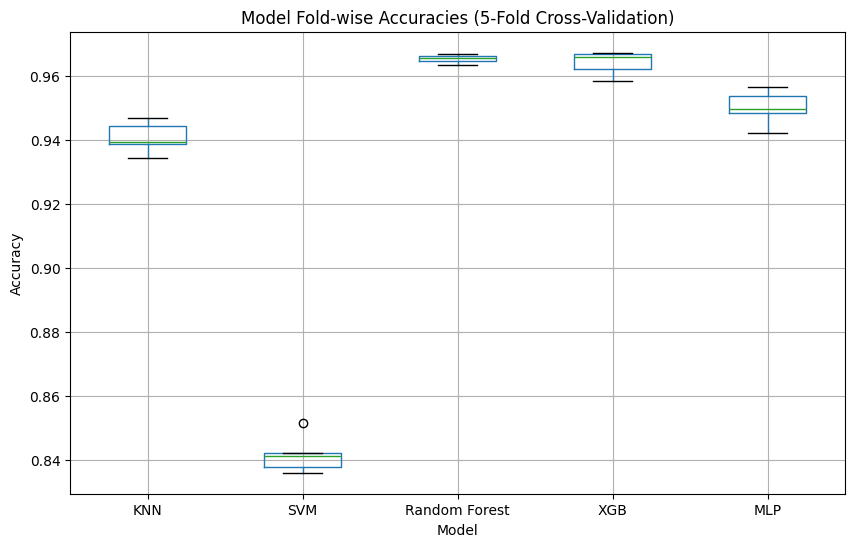

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGB": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "MLP": MLPClassifier(max_iter=300)
}

# Perform 5-fold stratified cross-validation and collect fold-wise accuracies
def evaluate_models(models, X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    results = {}
    
    for name, model in models.items():
        fold_accuracies = cross_val_score(model, X, y, cv=skf)
        results[name] = fold_accuracies
        print(f"{name} - Fold Accuracies: {fold_accuracies}")
    
    return results

# Generate boxplot for model accuracies
def plot_boxplot(results):
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(10, 6))
    results_df.boxplot()
    plt.title("Model Fold-wise Accuracies (5-Fold Cross-Validation)")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.show()

# Assume X_train and y_train are already defined
results = evaluate_models(models, X_train, y_train)
plot_boxplot(results)


Test Accuracy: 0.8125


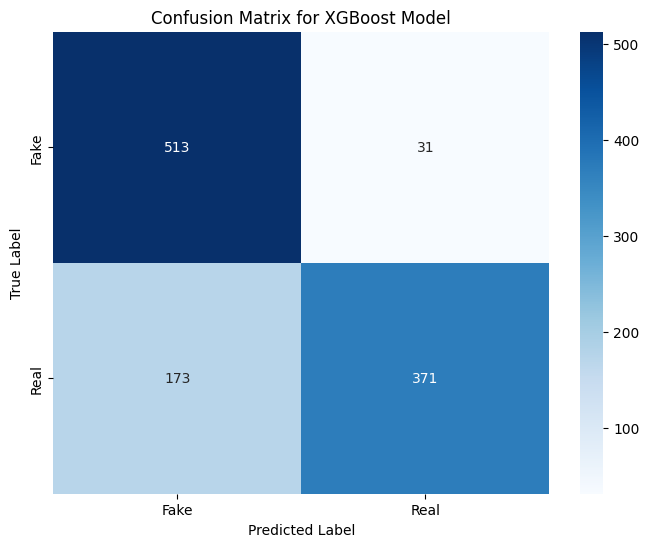

In [28]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the XGBoost model
# model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()


## Experiments 2.0

### Performance using individual features

mfcc_mean 5-fold cv

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_mfcc_mean.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)


Training Logistic Regression...
Fold 1 - Accuracy: 0.7551, Precision: 0.7655, Recall: 0.7354, F1 Score: 0.7502
Fold 2 - Accuracy: 0.7542, Precision: 0.7545, Recall: 0.7540, F1 Score: 0.7542
Fold 3 - Accuracy: 0.7619, Precision: 0.7646, Recall: 0.7569, F1 Score: 0.7607
Fold 4 - Accuracy: 0.7753, Precision: 0.7705, Recall: 0.7843, F1 Score: 0.7773
Fold 5 - Accuracy: 0.7574, Precision: 0.7634, Recall: 0.7461, F1 Score: 0.7547
Logistic Regression - Avg Accuracy: 0.7608, Avg Precision: 0.7637, Avg Recall: 0.7553, Avg F1 Score: 0.7594
Training Random Forest...
Fold 1 - Accuracy: 0.9651, Precision: 0.9716, Recall: 0.9583, F1 Score: 0.9649
Fold 2 - Accuracy: 0.9672, Precision: 0.9684, Recall: 0.9661, F1 Score: 0.9672
Fold 3 - Accuracy: 0.9654, Precision: 0.9756, Recall: 0.9547, F1 Score: 0.9651
Fold 4 - Accuracy: 0.9717, Precision: 0.9759, Recall: 0.9672, F1 Score: 0.9716
Fold 5 - Accuracy: 0.9651, Precision: 0.9733, Recall: 0.9565, F1 Score: 0.9648
Random Forest - Avg Accuracy: 0.9669, Avg Pr

mfcc_mean_train_test

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_mfcc_mean.pkl'
test_file = './features/testing_mfcc_mean.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.7197, Precision: 0.7145, Recall: 0.7316, F1 Score: 0.7230
Training Random Forest...
Random Forest - Accuracy: 0.6222, Precision: 0.5798, Recall: 0.8879, F1 Score: 0.7015
Training MLP...
MLP - Accuracy: 0.4669, Precision: 0.4821, Recall: 0.8897, F1 Score: 0.6253
Training KNN...
KNN - Accuracy: 0.6305, Precision: 0.5870, Recall: 0.8805, F1 Score: 0.7044
Training SVM...
SVM - Accuracy: 0.4881, Precision: 0.4933, Recall: 0.8732, F1 Score: 0.6304
Training XGBoost...
XGBoost - Accuracy: 0.5873, Precision: 0.5540, Recall: 0.8952, F1 Score: 0.6845

Final Test Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.719669   0.714542  0.731618  0.722979
1        Random Forest  0.622243   0.579832  0.887868  0.701525
2                  MLP  0.466912   0.482072  0.889706  0.625323
3                  KNN  0.630515   0.587010  0.880515  0.704412
4                  SVM  0.488051   0.493250  0.

mfcc_full_CV

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_mfcc_full.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)


Training Logistic Regression...
Fold 1 - Accuracy: 0.7712, Precision: 0.7774, Recall: 0.7598, F1 Score: 0.7685
Fold 2 - Accuracy: 0.7834, Precision: 0.7820, Recall: 0.7862, F1 Score: 0.7841
Fold 3 - Accuracy: 0.7893, Precision: 0.7923, Recall: 0.7843, F1 Score: 0.7883
Fold 4 - Accuracy: 0.7983, Precision: 0.7895, Recall: 0.8135, F1 Score: 0.8013
Fold 5 - Accuracy: 0.7741, Precision: 0.7758, Recall: 0.7712, F1 Score: 0.7735
Logistic Regression - Avg Accuracy: 0.7833, Avg Precision: 0.7834, Avg Recall: 0.7830, Avg F1 Score: 0.7831
Training Random Forest...
Fold 1 - Accuracy: 0.8671, Precision: 0.9090, Recall: 0.8159, F1 Score: 0.8599
Fold 2 - Accuracy: 0.8588, Precision: 0.8998, Recall: 0.8076, F1 Score: 0.8512
Fold 3 - Accuracy: 0.8656, Precision: 0.9093, Recall: 0.8123, F1 Score: 0.8580
Fold 4 - Accuracy: 0.8671, Precision: 0.9069, Recall: 0.8182, F1 Score: 0.8603
Fold 5 - Accuracy: 0.8543, Precision: 0.8998, Recall: 0.7974, F1 Score: 0.8455
Random Forest - Avg Accuracy: 0.8626, Avg Pr

mfcc full train-test

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_mfcc_full.pkl'
test_file = './features/testing_mfcc_full.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.7564, Precision: 0.7709, Recall: 0.7298, F1 Score: 0.7498
Training Random Forest...
Random Forest - Accuracy: 0.5855, Precision: 0.6195, Recall: 0.4430, F1 Score: 0.5166
Training MLP...
MLP - Accuracy: 0.7096, Precision: 0.6881, Recall: 0.7665, F1 Score: 0.7252
Training KNN...
KNN - Accuracy: 0.4926, Precision: 0.4963, Recall: 0.9853, F1 Score: 0.6601
Training SVM...
SVM - Accuracy: 0.7537, Precision: 0.7012, Recall: 0.8842, F1 Score: 0.7821
Training XGBoost...
XGBoost - Accuracy: 0.6728, Precision: 0.6526, Recall: 0.7390, F1 Score: 0.6931

Final Test Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.756434   0.770874  0.729779  0.749764
1        Random Forest  0.585478   0.619537  0.443015  0.516613
2                  MLP  0.709559   0.688119  0.766544  0.725217
3                  KNN  0.492647   0.496296  0.985294  0.660099
4                  SVM  0.753676   0.701166  0.

Spectrogram mean CV

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_spectral_db_mean.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)


Training Logistic Regression...
Fold 1 - Accuracy: 0.9508, Precision: 0.9599, Recall: 0.9410, F1 Score: 0.9503
Fold 2 - Accuracy: 0.9565, Precision: 0.9549, Recall: 0.9583, F1 Score: 0.9566
Fold 3 - Accuracy: 0.9541, Precision: 0.9596, Recall: 0.9482, F1 Score: 0.9538
Fold 4 - Accuracy: 0.9568, Precision: 0.9571, Recall: 0.9565, F1 Score: 0.9568
Fold 5 - Accuracy: 0.9592, Precision: 0.9701, Recall: 0.9476, F1 Score: 0.9587
Logistic Regression - Avg Accuracy: 0.9555, Avg Precision: 0.9603, Avg Recall: 0.9503, Avg F1 Score: 0.9553
Training Random Forest...
Fold 1 - Accuracy: 0.9851, Precision: 0.9805, Recall: 0.9899, F1 Score: 0.9852
Fold 2 - Accuracy: 0.9851, Precision: 0.9828, Recall: 0.9875, F1 Score: 0.9851
Fold 3 - Accuracy: 0.9899, Precision: 0.9875, Recall: 0.9923, F1 Score: 0.9899
Fold 4 - Accuracy: 0.9896, Precision: 0.9864, Recall: 0.9928, F1 Score: 0.9896
Fold 5 - Accuracy: 0.9923, Precision: 0.9899, Recall: 0.9946, F1 Score: 0.9923
Random Forest - Avg Accuracy: 0.9884, Avg Pr

In [11]:
results_df.to_csv('spectrogram_mean_CV_results.csv', index=False)

Spectrogram mean train-test

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_spectral_db_mean.pkl'
test_file = './features/testing_spectral_db_mean.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.7509, Precision: 0.6683, Recall: 0.9963, F1 Score: 0.8000
Training Random Forest...
Random Forest - Accuracy: 0.6452, Precision: 0.5849, Recall: 1.0000, F1 Score: 0.7381
Training MLP...
MLP - Accuracy: 0.7325, Precision: 0.6519, Recall: 0.9982, F1 Score: 0.7887
Training KNN...
KNN - Accuracy: 0.6921, Precision: 0.6255, Recall: 0.9577, F1 Score: 0.7567
Training SVM...
SVM - Accuracy: 0.7004, Precision: 0.6256, Recall: 0.9982, F1 Score: 0.7691
Training XGBoost...
XGBoost - Accuracy: 0.7233, Precision: 0.6438, Recall: 1.0000, F1 Score: 0.7833

Final Test Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.750919   0.668311  0.996324  0.800000
1        Random Forest  0.645221   0.584946  1.000000  0.738128
2                  MLP  0.732537   0.651861  0.998162  0.788671
3                  KNN  0.692096   0.625450  0.957721  0.756718
4                  SVM  0.700368   0.625576  0.

In [13]:
results_df.to_csv('spectrogram_mean_test_results.csv', index=False)

Spectrogram full CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_spectral_db_full.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)


Training Logistic Regression...
Fold 1 - Accuracy: 0.8886, Precision: 0.8831, Recall: 0.8957, F1 Score: 0.8893
Fold 2 - Accuracy: 0.8817, Precision: 0.8701, Recall: 0.8976, F1 Score: 0.8836
Fold 3 - Accuracy: 0.8945, Precision: 0.8818, Recall: 0.9112, F1 Score: 0.8962
Fold 4 - Accuracy: 0.8951, Precision: 0.8824, Recall: 0.9118, F1 Score: 0.8968
Fold 5 - Accuracy: 0.8886, Precision: 0.8804, Recall: 0.8993, F1 Score: 0.8897
Logistic Regression - Avg Accuracy: 0.8897, Avg Precision: 0.8795, Avg Recall: 0.9031, Avg F1 Score: 0.8912
Training Random Forest...
Fold 1 - Accuracy: 0.9339, Precision: 0.9062, Recall: 0.9678, F1 Score: 0.9360
Fold 2 - Accuracy: 0.9389, Precision: 0.9183, Recall: 0.9637, F1 Score: 0.9404
Fold 3 - Accuracy: 0.9443, Precision: 0.9224, Recall: 0.9702, F1 Score: 0.9457
Fold 4 - Accuracy: 0.9440, Precision: 0.9214, Recall: 0.9708, F1 Score: 0.9454
Fold 5 - Accuracy: 0.9470, Precision: 0.9252, Recall: 0.9726, F1 Score: 0.9483
Random Forest - Avg Accuracy: 0.9416, Avg Pr

In [ ]:
results_df.to_csv('spectrogram_full_CV_results.csv', index=False)

Spectrogram full test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_spectral_db_full.pkl'
test_file = './features/testing_spectral_db_full.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)


In [ ]:
results_df.to_csv('spectrogram_full_test_results.csv', index=False)


chroma mean CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_chroma_mean.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)
results_df.to_csv('chroma_mean_CV_results.csv', index=False)


Chroma mean test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_chroma_mean.pkl'
test_file = './features/testing_chroma_mean.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)
results_df.to_csv('chroma_mean_test_results.csv', index=False)


Chroma full CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = './features/training_chroma_full.pkl'
with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Separate features and labels
X = df.drop(columns=['file_path', 'is_real']).values
y = df['is_real'].values

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Store results
results = []

# Cross-validation loop
for model_name, model in models.items():
    print(f"Training {model_name}...")
    fold_results = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        # Split data into training and testing
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Scale features
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store fold results
        fold_results.append((acc, prec, rec, f1))
    
    # Average results across folds
    avg_results = np.mean(fold_results, axis=0)
    print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
    results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Cross-Validation Results:")
print(results_df)
results_df.to_csv('chroma_full_CV_results.csv', index=False)


Chroma full test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Load training and testing datasets
train_file = './features/training_chroma_full.pkl'
test_file = './features/testing_chroma_full.pkl'

with open(train_file, 'rb') as f:
    train_df = pickle.load(f)

with open(test_file, 'rb') as f:
    test_df = pickle.load(f)

# Separate features and labels for training and testing
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values

X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize standard scaler
scaler = StandardScaler()

# Scale training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store results
results = []

# Train and test each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
    
    # Store results
    results.append((model_name, acc, prec, rec, f1))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display results
print("\nFinal Test Results:")
print(results_df)
results_df.to_csv('chroma_full_test_results.csv', index=False)


### individual sweep

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle
feature_sets = ['MFCC_mean','MFCC_full','spectral_db_mean','spectral_db_full','chroma_mean', 'chroma_full', 'spectral_contrast_mean', 'spectral_contrast_full', 'BHDR', 'BHDR_full']
# feature_sets = ['BHDR', 'BHDR_full']

for feature_set in feature_sets:
    # CV
    
    # Suppress warnings for ill-defined metrics
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # Load the dataset
    file_path = f'./features/training_{feature_set}.pkl'
    with open(file_path, 'rb') as f:
        df = pickle.load(f)

    # Separate features and labels
    X = df.drop(columns=['file_path', 'is_real']).values
    y = df['is_real'].values

    # Initialize StratifiedKFold
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Initialize models
    models = {
        "SVM": SVC(random_state=42),
    }

    # Initialize standard scaler
    scaler = StandardScaler()

    # Store results
    results = []

    # Cross-validation loop
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        fold_results = []
        
        for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
            # Split data into training and testing
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            # Scale features
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Evaluate
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            
            print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
            
            # Store fold results
            fold_results.append((acc, prec, rec, f1))
        
        # Average results across folds
        avg_results = np.mean(fold_results, axis=0)
        print(f"{model_name} - Avg Accuracy: {avg_results[0]:.4f}, Avg Precision: {avg_results[1]:.4f}, Avg Recall: {avg_results[2]:.4f}, Avg F1 Score: {avg_results[3]:.4f}")
        results.append((model_name, avg_results[0], avg_results[1], avg_results[2], avg_results[3]))

    # Create a DataFrame for results
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Display results
    print("\nFinal Cross-Validation Results:")
    print(results_df)
    print
    results_df.to_csv(f'{feature_set}_CV_results.csv', index=False)



    
    # Load training and testing datasets
    train_file = f'./features/training_{feature_set}.pkl'
    test_file = f'./features/testing_{feature_set}.pkl'

    with open(train_file, 'rb') as f:
        train_df = pickle.load(f)

    with open(test_file, 'rb') as f:
        test_df = pickle.load(f)

    # Separate features and labels for training and testing
    X_train = train_df.drop(columns=['file_path', 'is_real']).values
    y_train = train_df['is_real'].values

    X_test = test_df.drop(columns=['file_path', 'is_real']).values
    y_test = test_df['is_real'].values

    # Initialize models
    models = {
        "SVM": SVC(random_state=42),
    }

    # Initialize standard scaler
    scaler = StandardScaler()

    # Scale training and testing data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Store results
    results = []

    # Train and test each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")
        
        # Store results
        results.append((model_name, acc, prec, rec, f1))

    # Create a DataFrame for results
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Display results
    print("\nFinal Test Results:")
    print(results_df)
    results_df.to_csv(f'{feature_set}_test_results.csv', index=False)



Training SVM...
Fold 1 - Accuracy: 0.7768, Precision: 0.7934, Recall: 0.7416, F1 Score: 0.7666
Fold 2 - Accuracy: 0.7919, Precision: 0.8143, Recall: 0.7503, F1 Score: 0.7810
Fold 3 - Accuracy: 0.7849, Precision: 0.8073, Recall: 0.7424, F1 Score: 0.7735
Fold 4 - Accuracy: 0.7996, Precision: 0.8190, Recall: 0.7636, F1 Score: 0.7903
Fold 5 - Accuracy: 0.7975, Precision: 0.8088, Recall: 0.7733, F1 Score: 0.7907
SVM - Avg Accuracy: 0.7902, Avg Precision: 0.8085, Avg Recall: 0.7542, Avg F1 Score: 0.7804

Final Cross-Validation Results:
  Model  Accuracy  Precision    Recall  F1 Score
0   SVM  0.790156   0.808532  0.754236  0.780403
Training SVM...
SVM - Accuracy: 0.5993, Precision: 0.7389, Recall: 0.3070, F1 Score: 0.4338

Final Test Results:
  Model  Accuracy  Precision    Recall  F1 Score
0   SVM  0.599265   0.738938  0.306985  0.433766
Training SVM...
Fold 1 - Accuracy: 0.7909, Precision: 0.7943, Recall: 0.7849, F1 Score: 0.7896
Fold 2 - Accuracy: 0.8117, Precision: 0.8186, Recall: 0.8011

In [10]:
import pandas as pd

# List of feature sets
feature_sets = [
    'spectral_db_mean', 'spectral_db_full', 'chroma_mean', 
    'chroma_full', 'spectral_contrast_mean', 'spectral_contrast_full', 
    'BHDR', 'BHDR_full'
]

# Initialize a list to store results
summary_results = []

# Process each feature set
for feature_set in feature_sets:
    # Read CV results
    cv_results_file = f'{feature_set}_CV_results.csv'
    cv_results = pd.read_csv(cv_results_file)
    
    # Extract Accuracy and F1 Score for CV
    cv_accuracy = cv_results.loc[cv_results['Model'] == 'SVM', 'Accuracy'].values[0]
    cv_f1 = cv_results.loc[cv_results['Model'] == 'SVM', 'F1 Score'].values[0]
    
    # Read Test results
    test_results_file = f'{feature_set}_test_results.csv'
    test_results = pd.read_csv(test_results_file)
    
    # Extract Accuracy and F1 Score for Test
    test_accuracy = test_results.loc[test_results['Model'] == 'SVM', 'Accuracy'].values[0]
    test_f1 = test_results.loc[test_results['Model'] == 'SVM', 'F1 Score'].values[0]
    
    # Append to summary results
    summary_results.append([feature_set, cv_accuracy, cv_f1, test_accuracy, test_f1])

# Create a DataFrame for the summary results
summary_df = pd.DataFrame(
    summary_results, 
    columns=['Feature Set', 'CV Accuracy', 'CV F1 Score', 'Test Accuracy', 'Test F1 Score']
)

# Save the summary to a new CSV file
summary_csv_file = 'svm_summary_results.csv'
summary_df.to_csv(summary_csv_file, index=False)

# Display the summary DataFrame
print(summary_df)


              Feature Set  CV Accuracy  CV F1 Score  Test Accuracy  \
0        spectral_db_mean     0.992492     0.992497       0.700368   
1        spectral_db_full     0.982958     0.982967       0.751838   
2             chroma_mean     0.689847     0.691382       0.517463   
3             chroma_full     0.721428     0.722273       0.656250   
4  spectral_contrast_mean     0.896020     0.895843       0.465993   
5  spectral_contrast_full     0.929508     0.928860       0.463235   
6                    BHDR     0.790156     0.780403       0.599265   
7               BHDR_full     0.804612     0.802885       0.652574   

   Test F1 Score  
0       0.769122  
1       0.787736  
2       0.501425  
3       0.691928  
4       0.634361  
5       0.630847  
6       0.433766  
7       0.512887  


### Combination of features

In [12]:
feature_sets = ['MFCC_mean','MFCC_full','spectral_db_mean','spectral_db_full','chroma_mean', 'chroma_full', 'spectral_contrast_mean', 'spectral_contrast_full', 'BHDR', 'BHDR_full']

for feature_set in feature_sets:
    temp = pd.read_pickle(f'./features/testing_{feature_set}.pkl')
    print(f'{feature_set} - {temp.shape[1]}')

MFCC_mean - 15
MFCC_full - 821
spectral_db_mean - 1027
spectral_db_full - 8129
chroma_mean - 14
chroma_full - 758
spectral_contrast_mean - 9
spectral_contrast_full - 443
BHDR - 6
BHDR_full - 192


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define feature combinations
feature_combinations = {
    "MFCC_mean + Spectral_mean": ['training_mfcc_mean.pkl', 'training_spectral_db_mean.pkl'],
    "MFCC_mean + Chroma_mean": ['training_mfcc_mean.pkl', 'training_chroma_mean.pkl'],
    "MFCC_mean + BHDR": ['training_mfcc_mean.pkl', 'training_BHDR.pkl'],
    "MFCC_mean + Spectral_mean + Chroma_mean + BHDR": [
        'training_mfcc_mean.pkl',
        'training_spectral_db_mean.pkl',
        'training_chroma_mean.pkl',
        'training_BHDR.pkl'
    ]
}

# Initialize models
models = {
    "SVM": SVC(random_state=42),
}

# Function to merge feature sets
def merge_feature_sets(feature_files):
    merged_df = None
    for feature_file in feature_files:
        with open(f'./features/{feature_file}', 'rb') as f:
            df = pickle.load(f)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df.drop(columns=['file_path', 'is_real']), left_index=True, right_index=True)
    return merged_df

# Function to train and test models
def evaluate_combination(name, train_files, test_files):
    # Merge training and testing datasets
    train_df = merge_feature_sets(train_files)
    test_df = merge_feature_sets(test_files)

    # Separate features and labels
    X_train = train_df.drop(columns=['file_path', 'is_real']).values
    y_train = train_df['is_real'].values
    X_test = test_df.drop(columns=['file_path', 'is_real']).values
    y_test = test_df['is_real'].values

    # Initialize standard scaler
    scaler = StandardScaler()

    # Scale training and testing data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize results storage
    cv_results = []
    test_results = []

    # Cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for model_name, model in models.items():
        print(f"Evaluating {model_name} for {name}...")

        fold_results = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data into training and testing
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

            # Train the model
            model.fit(X_train_fold, y_train_fold)

            # Make predictions
            y_pred_fold = model.predict(X_test_fold)

            # Evaluate
            acc = accuracy_score(y_test_fold, y_pred_fold)
            f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
            fold_results.append((acc, f1))

        # Average CV results
        avg_results = np.mean(fold_results, axis=0)
        print(f"{model_name} CV - Accuracy: {avg_results[0]:.4f}, F1 Score: {avg_results[1]:.4f}")
        cv_results.append((model_name, avg_results[0], avg_results[1]))

        # External testing
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test, zero_division=0)
        print(f"{model_name} Test - Accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}")
        test_results.append((model_name, test_acc, test_f1))

    return cv_results, test_results


# Evaluate each combination
all_results = []
for combination_name, feature_files in feature_combinations.items():
    train_files = feature_files
    test_files = [file.replace('training', 'testing') for file in feature_files]

    cv_results, test_results = evaluate_combination(combination_name, train_files, test_files)

    for cv_result, test_result in zip(cv_results, test_results):
        all_results.append([
            combination_name,
            cv_result[1],  # CV Accuracy
            cv_result[2],  # CV F1 Score
            test_result[1],  # Test Accuracy
            test_result[2],  # Test F1 Score
        ])
    cv_results_df = pd.DataFrame(cv_results, columns=['Model', 'CV Accuracy', 'CV F1 Score'])
    test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test F1 Score'])
    cv_results_df.to_csv(f'{combination_name}_CV_results.csv', index=False)
    test_results_df.to_csv(f'{combination_name}_test_results.csv', index=False)

# Create DataFrame for all results
results_df = pd.DataFrame(all_results, columns=[
    'Feature Combination', 'CV Accuracy', 'CV F1 Score', 'Test Accuracy', 'Test F1 Score'
])

# Save results to a CSV file
results_df.to_csv('meanfeature_combination_results.csv', index=False)

# Display results
print(results_df)


Evaluating SVM for MFCC_mean + Spectral_mean...
SVM CV - Accuracy: 0.9926, F1 Score: 0.9926
SVM Test - Accuracy: 0.7022, F1 Score: 0.7705
Evaluating SVM for MFCC_mean + Chroma_mean...
SVM CV - Accuracy: 0.9728, F1 Score: 0.9726
SVM Test - Accuracy: 0.6985, F1 Score: 0.7465
Evaluating SVM for MFCC_mean + BHDR...
SVM CV - Accuracy: 0.9851, F1 Score: 0.9848
SVM Test - Accuracy: 0.6011, F1 Score: 0.6965
Evaluating SVM for MFCC_mean + Spectral_mean + Chroma_mean + BHDR...
SVM CV - Accuracy: 0.9948, F1 Score: 0.9948
SVM Test - Accuracy: 0.7381, F1 Score: 0.7924
                              Feature Combination  CV Accuracy  CV F1 Score  \
0                       MFCC_mean + Spectral_mean     0.992552     0.992555   
1                         MFCC_mean + Chroma_mean     0.972828     0.972597   
2                                MFCC_mean + BHDR     0.985119     0.984839   
3  MFCC_mean + Spectral_mean + Chroma_mean + BHDR     0.994819     0.994760   

   Test Accuracy  Test F1 Score  
0       

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define feature combinations
feature_combinations = {
    "MFCC + Spectral_mean": ['training_mfcc_full.pkl', 'training_spectral_db_mean.pkl'],
    "MFCC + Chroma": ['training_mfcc_full.pkl', 'training_chroma_full.pkl'],
    "MFCC + BHDR": ['training_mfcc_full.pkl', 'training_BHDR_full.pkl'],
    "MFCC + Spectral_mean + Chroma + BHDR": [
        'training_mfcc_full.pkl',
        'training_spectral_db_mean.pkl',
        'training_chroma_full.pkl',
        'training_BHDR_full.pkl'
    ]
}

# Initialize models
models = {
    "SVM": SVC(random_state=42),
}

# Function to merge feature sets
def merge_feature_sets(feature_files):
    merged_df = None
    for feature_file in feature_files:
        with open(f'./features/{feature_file}', 'rb') as f:
            df = pickle.load(f)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df.drop(columns=['file_path', 'is_real']), left_index=True, right_index=True)
    return merged_df

# Function to train and test models
def evaluate_combination(name, train_files, test_files):
    # Merge training and testing datasets
    train_df = merge_feature_sets(train_files)
    test_df = merge_feature_sets(test_files)

    # Separate features and labels
    X_train = train_df.drop(columns=['file_path', 'is_real']).values
    y_train = train_df['is_real'].values
    X_test = test_df.drop(columns=['file_path', 'is_real']).values
    y_test = test_df['is_real'].values

    # Initialize standard scaler
    scaler = StandardScaler()

    # Scale training and testing data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize results storage
    cv_results = []
    test_results = []

    # Cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for model_name, model in models.items():
        print(f"Evaluating {model_name} for {name}...")

        fold_results = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data into training and testing
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

            # Train the model
            model.fit(X_train_fold, y_train_fold)

            # Make predictions
            y_pred_fold = model.predict(X_test_fold)

            # Evaluate
            acc = accuracy_score(y_test_fold, y_pred_fold)
            f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
            fold_results.append((acc, f1))

        # Average CV results
        avg_results = np.mean(fold_results, axis=0)
        print(f"{model_name} CV - Accuracy: {avg_results[0]:.4f}, F1 Score: {avg_results[1]:.4f}")
        cv_results.append((model_name, avg_results[0], avg_results[1]))

        # External testing
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test, zero_division=0)
        print(f"{model_name} Test - Accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}")
        test_results.append((model_name, test_acc, test_f1))

    return cv_results, test_results


# Evaluate each combination
all_results = []
for combination_name, feature_files in feature_combinations.items():
    train_files = feature_files
    test_files = [file.replace('training', 'testing') for file in feature_files]

    cv_results, test_results = evaluate_combination(combination_name, train_files, test_files)

    for cv_result, test_result in zip(cv_results, test_results):
        all_results.append([
            combination_name,
            cv_result[1],  # CV Accuracy
            cv_result[2],  # CV F1 Score
            test_result[1],  # Test Accuracy
            test_result[2],  # Test F1 Score
        ])
    cv_results_df = pd.DataFrame(cv_results, columns=['Model', 'CV Accuracy', 'CV F1 Score'])
    test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test F1 Score'])
    cv_results_df.to_csv(f'{combination_name}_CV_results.csv', index=False)
    test_results_df.to_csv(f'{combination_name}_test_results.csv', index=False)

# Create DataFrame for all results
results_df = pd.DataFrame(all_results, columns=[
    'Feature Combination', 'CV Accuracy', 'CV F1 Score', 'Test Accuracy', 'Test F1 Score'
])

# Save results to a CSV file
results_df.to_csv('fullfeature_combination_results.csv', index=False)

# Display results
print(results_df)


Evaluating SVM for MFCC + Spectral_mean...
SVM CV - Accuracy: 0.9914, F1 Score: 0.9913
SVM Test - Accuracy: 0.7252, F1 Score: 0.7841
Evaluating SVM for MFCC + Chroma...
SVM CV - Accuracy: 0.9514, F1 Score: 0.9504
SVM Test - Accuracy: 0.6958, F1 Score: 0.7307
Evaluating SVM for MFCC + BHDR...
SVM CV - Accuracy: 0.9585, F1 Score: 0.9574
SVM Test - Accuracy: 0.8116, F1 Score: 0.8184
Evaluating SVM for MFCC + Spectral_mean + Chroma + BHDR...
SVM CV - Accuracy: 0.9918, F1 Score: 0.9918
SVM Test - Accuracy: 0.7509, F1 Score: 0.7994
                    Feature Combination  CV Accuracy  CV F1 Score  \
0                  MFCC + Spectral_mean     0.991360     0.991333   
1                         MFCC + Chroma     0.951377     0.950406   
2                           MFCC + BHDR     0.958467     0.957353   
3  MFCC + Spectral_mean + Chroma + BHDR     0.991837     0.991816   

   Test Accuracy  Test F1 Score  
0       0.725184       0.784116  
1       0.695772       0.730675  
2       0.811581    

### Hyper prameter tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

def merge_feature_sets(feature_files):
    merged_df = None
    for feature_file in feature_files:
        with open(feature_file, 'rb') as f:
            df = pickle.load(f)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df.drop(columns=['is_real']), on='file_path')
    return merged_df

# Load training and testing datasets
train_mfcc_file = './features/training_mfcc_13.pkl'
train_bhdr_file = './features/training_BHDR_full.pkl'
test_mfcc_file = './features/testing_mfcc_13.pkl'
test_bhdr_file = './features/testing_BHDR_full.pkl'

train_files = [train_mfcc_file, train_bhdr_file]
test_files = [test_mfcc_file, test_bhdr_file ]

train_df = merge_feature_sets(train_files)
test_df = merge_feature_sets(test_files)

# Separate features and labels
X_train = train_df.drop(columns=['file_path', 'is_real']).values
y_train = train_df['is_real'].values
X_test = test_df.drop(columns=['file_path', 'is_real']).values
y_test = test_df['is_real'].values

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
def tune_svc(X_train, y_train):
    # Initialize SVM
    svm = SVC(gamma='auto')
    
    # Define hyperparameter grid
    param_grid = {
        'kernel': ['rbf', 'linear', 'poly'],
        'C': [0.1, 1, 10, 100]
    }

    # GridSearchCV
    grid_search = GridSearchCV(
        svm,
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=4  # Display progress for each parameter combination
    )
    # print(X_train.shape)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

# Evaluate the model
def evaluate_model(X_train, y_train, X_test, y_test, best_params):
    # Initialize SVM with best parameters
    svm = SVC(**best_params, gamma='auto')
    svm.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = svm.predict(X_test)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    return acc, f1, prec, rec

# Main script
if __name__ == "__main__":
    # Tune SVC hyperparameters
    print("Tuning SVC...")
    best_params, best_cv_score = tune_svc(X_train, y_train)
    print(f"\nBest parameters: {best_params}")
    print(f"Best CV F1 Score: {best_cv_score:.4f}")
    
    # Evaluate on the test set
    print("\nEvaluating on test set...")
    acc, f1, prec, rec = evaluate_model(X_train, y_train, X_test, y_test, best_params)
    print(f"Test Results - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}")
    
    # Save results
    results = {
        'best_params': best_params,
        'cv_f1_score': best_cv_score,
        'test_accuracy': acc,
        'test_f1_score': f1,
        'test_precision': prec,
        'test_recall': rec
    }
    results_df = pd.DataFrame([results])
    results_df.to_csv('svm_mfcc13_tune.csv', index=False)
    print("\nFinal Results:")
    print(results_df)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import pickle

# Suppress warnings for ill-defined metrics
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define feature combinations
feature_combinations = {
    "MFCC9 + BHDR": ['training_mfcc_9.pkl', 'training_BHDR_full.pkl'],
    "MFCC13 + BHDR": ['training_mfcc_13.pkl', 'training_BHDR_full.pkl'],
    "MFCC17 + BHDR": ['training_mfcc_17.pkl', 'training_BHDR_full.pkl'],
}

# Initialize models
models = {
    "SVM": SVC(kernel='rbf', gamma='auto', C=1,random_state=42),
}

# Function to merge feature sets
def merge_feature_sets(feature_files):
    merged_df = None
    for feature_file in feature_files:
        with open(f'./features/{feature_file}', 'rb') as f:
            df = pickle.load(f)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df.drop(columns=['is_real']), on='file_path')
    return merged_df

# Function to train and test models
def evaluate_combination(name, train_files, test_files):
    # Merge training and testing datasets
    train_df = merge_feature_sets(train_files)
    test_df = merge_feature_sets(test_files)

    # Separate features and labels
    X_train = train_df.drop(columns=['file_path', 'is_real']).values
    y_train = train_df['is_real'].values
    X_test = test_df.drop(columns=['file_path', 'is_real']).values
    y_test = test_df['is_real'].values

    # Initialize standard scaler
    scaler = StandardScaler()

    # Scale training and testing data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize results storage
    cv_results = []
    test_results = []

    # Cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for model_name, model in models.items():
        print(f"Evaluating {model_name} for {name}...")

        fold_results = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data into training and testing
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

            # Train the model
            model.fit(X_train_fold, y_train_fold)

            # Make predictions
            y_pred_fold = model.predict(X_test_fold)

            # Evaluate
            acc = accuracy_score(y_test_fold, y_pred_fold)
            f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
            fold_results.append((acc, f1))

        # Average CV results
        avg_results = np.mean(fold_results, axis=0)
        print(f"{model_name} CV - Accuracy: {avg_results[0]:.4f}, F1 Score: {avg_results[1]:.4f}")
        cv_results.append((model_name, avg_results[0], avg_results[1]))

        # External testing
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test, zero_division=0)
        print(f"{model_name} Test - Accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}")
        test_results.append((model_name, test_acc, test_f1))

    return cv_results, test_results


# Evaluate each combination
all_results = []
for combination_name, feature_files in feature_combinations.items():
    train_files = feature_files
    test_files = [file.replace('training', 'testing') for file in feature_files]

    cv_results, test_results = evaluate_combination(combination_name, train_files, test_files)

    for cv_result, test_result in zip(cv_results, test_results):
        all_results.append([
            combination_name,
            cv_result[1],  # CV Accuracy
            cv_result[2],  # CV F1 Score
            test_result[1],  # Test Accuracy
            test_result[2],  # Test F1 Score
        ])
    cv_results_df = pd.DataFrame(cv_results, columns=['Model', 'CV Accuracy', 'CV F1 Score'])
    test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test Accuracy', 'Test F1 Score'])
    cv_results_df.to_csv(f'{combination_name}_CV_results.csv', index=False)
    test_results_df.to_csv(f'{combination_name}_test_results.csv', index=False)

# Create DataFrame for all results
results_df = pd.DataFrame(all_results, columns=[
    'Feature Combination', 'CV Accuracy', 'CV F1 Score', 'Test Accuracy', 'Test F1 Score'
])

# Save results to a CSV file
results_df.to_csv('mfcc_9_13_17_svc.csv', index=False)

# Display results
print(results_df)


Evaluating SVM for MFCC9 + BHDR...
SVM CV - Accuracy: 0.9442, F1 Score: 0.9422
SVM Test - Accuracy: 0.7950, F1 Score: 0.7812
Evaluating SVM for MFCC13 + BHDR...
SVM CV - Accuracy: 0.9584, F1 Score: 0.9573
SVM Test - Accuracy: 0.8116, F1 Score: 0.8184
Evaluating SVM for MFCC17 + BHDR...
SVM CV - Accuracy: 0.9748, F1 Score: 0.9744
SVM Test - Accuracy: 0.6710, F1 Score: 0.7424
  Feature Combination  CV Accuracy  CV F1 Score  Test Accuracy  Test F1 Score
0        MFCC9 + BHDR     0.944167     0.942178       0.795037       0.781158
1       MFCC13 + BHDR     0.958408     0.957288       0.811581       0.818423
2       MFCC17 + BHDR     0.974795     0.974402       0.670956       0.742446


### Final Train

Evaluating SVC for MFCC13 + BHDR...
Fold 1 - Accuracy: 0.9556, F1 Score: 0.9545
Fold 2 - Accuracy: 0.9616, F1 Score: 0.9606
Fold 3 - Accuracy: 0.9562, F1 Score: 0.9550
Fold 4 - Accuracy: 0.9556, F1 Score: 0.9542
Fold 5 - Accuracy: 0.9631, F1 Score: 0.9621


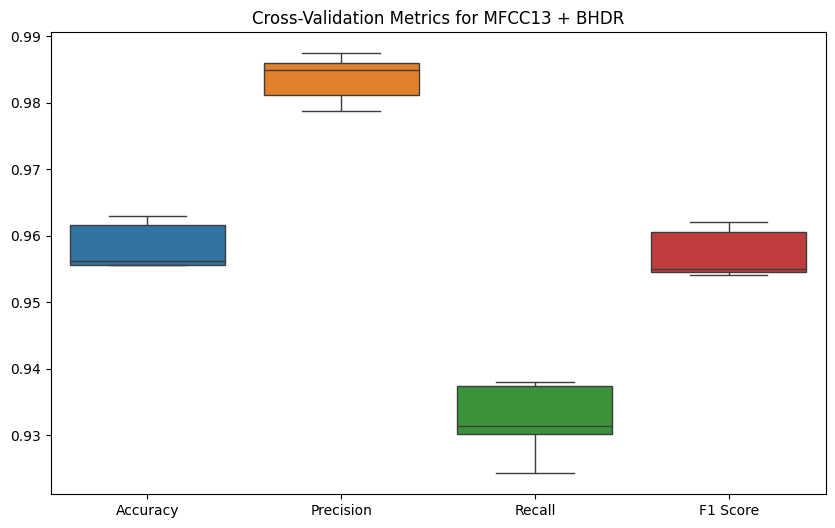

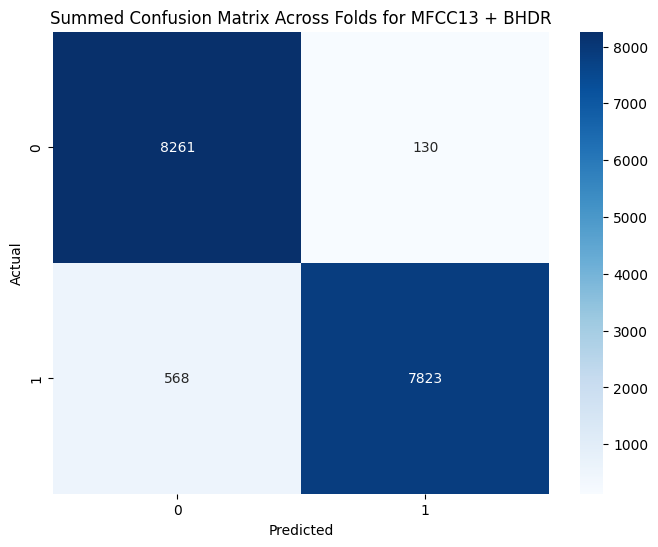

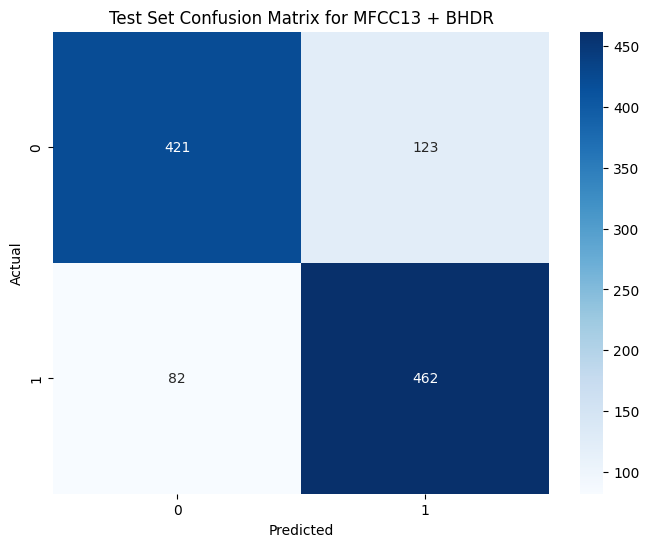


Final Results:
   Accuracy  Precision    Recall  F1 Score
0  0.955615   0.978710  0.931466  0.954504
1  0.961573   0.984981  0.937463  0.960635
2  0.956198   0.981144  0.930274  0.955032
3  0.955602   0.986014  0.924315  0.954168
4  0.963051   0.987453  0.938021  0.962103

Test Results:
   Test Accuracy  Test Precision  Test Recall  Test F1 Score
0       0.811581        0.789744     0.849265       0.818423


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define feature combinations
feature_combinations = {
    "MFCC13 + BHDR": ['training_mfcc_13.pkl', 'training_BHDR_full.pkl']
}

# Function to merge feature sets
def merge_feature_sets(feature_files):
    merged_df = None
    for feature_file in feature_files:
        with open(f'./features/{feature_file}', 'rb') as f:
            df = pickle.load(f)
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df.drop(columns=['is_real']), on='file_path')
    return merged_df

# Function to train and test models
def evaluate_combination(name, train_files, test_files):
    # Merge training and testing datasets
    train_df = merge_feature_sets(train_files)
    test_df = merge_feature_sets(test_files)

    # Separate features and labels
    X_train = train_df.drop(columns=['file_path', 'is_real']).values
    y_train = train_df['is_real'].values
    X_test = test_df.drop(columns=['file_path', 'is_real']).values
    y_test = test_df['is_real'].values

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize SVC
    model = SVC(kernel='rbf', gamma='auto', C=1, random_state=42)

    # Cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []
    confusion_matrix_sum = np.zeros((2, 2))  # Assuming binary classification
    print(f"Evaluating SVC for {name}...")
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
        # Split data into training and testing folds
        X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
        y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Make predictions
        y_pred_fold = model.predict(X_test_fold)

        # Evaluate fold
        acc = accuracy_score(y_test_fold, y_pred_fold)
        prec = precision_score(y_test_fold, y_pred_fold, zero_division=0)
        rec = recall_score(y_test_fold, y_pred_fold, zero_division=0)
        f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)

        fold_metrics.append((acc, prec, rec, f1))
        print(f"Fold {fold + 1} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

        # Update confusion matrix
        confusion_matrix_sum += confusion_matrix(y_test_fold, y_pred_fold)

    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame(
        fold_metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score']
    )

    # Boxplot of metrics
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=metrics_df)
    plt.title(f'Cross-Validation Metrics for {name}')
    plt.savefig(f'{name}_cv_metrics_boxplot.png')
    plt.show()

    # External testing
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test, zero_division=0)
    test_rec = recall_score(y_test, y_pred_test, zero_division=0)
    test_f1 = f1_score(y_test, y_pred_test, zero_division=0)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Confusion Matrices
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_sum.astype(int), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Summed Confusion Matrix Across Folds for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'{name}_cv_confusion_matrix.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm.astype(int), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Test Set Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'{name}_test_confusion_matrix.png')
    plt.show()


    return metrics_df, test_acc, test_prec, test_rec, test_f1, test_cm

# Evaluate each combination
for combination_name, feature_files in feature_combinations.items():
    train_files = feature_files
    test_files = [file.replace('training', 'testing') for file in feature_files]

    metrics_df, test_acc, test_prec, test_rec, test_f1, test_cm = evaluate_combination(
        combination_name, train_files, test_files
    )

    # Save results
    metrics_df.to_csv(f'{combination_name}_cv_metrics.csv', index=False)
    test_results = pd.DataFrame(
        [[test_acc, test_prec, test_rec, test_f1]],
        columns=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score']
    )
    test_results.to_csv(f'{combination_name}_test_results.csv', index=False)

    print("\nFinal Results:")
    print(metrics_df)
    print("\nTest Results:")
    print(test_results)
